<h2>📌 Project Title: Predicting Heart Attacks Using Machine Learning</h2>

<h3>Overview:</h3>
<p>
  This project aims to predict the likelihood of a heart attack based on patient data using machine learning techniques. 
  The goal is to identify patterns in medical features that may indicate increased risk, thereby supporting early intervention and prevention.
</p>

<h3>Key Steps:</h3>
<ul>
  <li>Exploratory Data Analysis (EDA)</li>
  <li>Handling missing values and data imbalance</li>
  <li>Feature engineering and encoding</li>
  <li>Training models (Random Forest, XGBoost, etc.)</li>
  <li>Evaluating performance using classification metrics (Precision, Recall, ROC-AUC)</li>
</ul>


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [4]:
data = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv")
print(" , ".join(data.columns))

State , Sex , GeneralHealth , PhysicalHealthDays , MentalHealthDays , LastCheckupTime , PhysicalActivities , SleepHours , RemovedTeeth , HadHeartAttack , HadAngina , HadStroke , HadAsthma , HadSkinCancer , HadCOPD , HadDepressiveDisorder , HadKidneyDisease , HadArthritis , HadDiabetes , DeafOrHardOfHearing , BlindOrVisionDifficulty , DifficultyConcentrating , DifficultyWalking , DifficultyDressingBathing , DifficultyErrands , SmokerStatus , ECigaretteUsage , ChestScan , RaceEthnicityCategory , AgeCategory , HeightInMeters , WeightInKilograms , BMI , AlcoholDrinkers , HIVTesting , FluVaxLast12 , PneumoVaxEver , TetanusLast10Tdap , HighRiskLastYear , CovidPos


<h3>Checking Null Values And Delete Unnecessary Columns</h3>
<p><strong>Step 1:</strong> The line <code>data.isnull().sum().sort_values()</code> checks for any missing values in the dataset by calculating the sum of null values for each column and sorting them in ascending order. This helps in identifying which columns have missing data and need to be handled.</p>

<p><strong>Step 2:</strong> The line <code>data = data.drop('State', axis=1)</code> removes the <em>'State'</em> column from the dataset. This step is performed because the 'State' feature may not provide valuable information for model predictions and could potentially introduce noise.</p>

In [5]:
data = data.drop('State', axis=1)
data = data.dropna(subset=['HadHeartAttack'])
data.isnull().sum().sort_values()

Sex                              0
HadHeartAttack                   0
HadDiabetes                    813
PhysicalActivities             972
HadStroke                     1070
GeneralHealth                 1095
HadAsthma                     1437
HadKidneyDisease              1614
HadCOPD                       1838
HadArthritis                  2313
HadDepressiveDisorder         2421
HadSkinCancer                 2764
HadAngina                     3588
SleepHours                    5196
LastCheckupTime               8041
MentalHealthDays              8792
AgeCategory                   8807
PhysicalHealthDays           10597
RemovedTeeth                 11010
RaceEthnicityCategory        13698
DeafOrHardOfHearing          20278
BlindOrVisionDifficulty      21190
DifficultyDressingBathing    23513
DifficultyWalking            23604
DifficultyConcentrating      23795
DifficultyErrands            25231
HeightInMeters               28141
SmokerStatus                 34941
ECigaretteUsage     

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


<h2>Handling Missing Values</h2>

<p>In this step, we address missing values in the dataset. For categorical columns, missing values are filled with the most frequent value (mode), and any remaining nulls are set to 'Unknown'. For numerical columns, missing values are filled based on their distribution: if the data is normally distributed, the median is used, otherwise, the mean is used. This ensures that the dataset is clean and ready for modeling.</p>


In [7]:
categorical_cols = data.select_dtypes(include=["object","category"]).columns
numerical_cols = data.select_dtypes(include=['float64']).columns
mode_fill_cols = ['HighRiskLastYear', 'CovidPos', 'ChestScan', 'HIVTesting' , 'PneumoVaxEver', 'TetanusLast10Tdap']  # Listeyi oluşturduktan sonra doldurulacaklar
for cols in mode_fill_cols:
    data[cols] = data[cols].fillna(data[cols].mode()[0])

for cols in categorical_cols:
    data[cols] = data[cols].fillna(data[cols].mode()[0])
    data[cols] = data[cols].fillna('Unknown')

for cols in numerical_cols:
    if(-0.5 < data[cols].skew() < 0.5):
        data[cols] = data[cols].fillna(data[cols].median())
    else:
        data[cols] = data[cols].fillna(data[cols].mean())


<h2>Encoding Categorical Features</h2>
<p>In this step, we apply encoding techniques to transform categorical variables into numerical values for machine learning. Some columns, such as 'GeneralHealth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', and 'RemovedTeeth', are mapped to predefined numerical scales based on their order. For other categorical variables like gender, physical activity status, health conditions, and test results, we use one-hot encoding to convert them into binary columns, making them suitable for modeling. This ensures that all categorical data is properly formatted for the machine learning algorithms.</p>


In [8]:
from sklearn.preprocessing import LabelEncoder
health_order = {
    'Excellent':4,
    'Very Good':3,
    'Good':2,
    'Fair':1,
    'Poor':0,
}
Smoke_order = {
    'Current smoker - now smokes every day':3,
    'Current smoker - now smokes some days':2,
    'Former smoker':1,
    'Never smoked':0,
}
ESig_order = {
    'Use them every day':3,
    'Use them some days':2,
    'Not at all (right now)':1,
    'Never used e-cigarettes in my entire life':0,
}
Age_order = {
'Age 80 or older':12, 
'Age 55 to 59':7,
'Age 40 to 44':4,
'Age 75 to 79':11, 
'Age 70 to 74':10, 
'Age 65 to 69':9, 
'Age 60 to 64':8,
'Age 50 to 54':6, 
'Age 45 to 49':5, 
'Age 35 to 39':3,
'Age 30 to 34':2,
'Age 25 to 29':1,
'Age 18 to 24':0
}
Teeth_order = {
'All':3,
'6 or more, but not all':2,
'1 to 5':1,
'None of them':0,
}
data['RemovedTeeth'] = data['RemovedTeeth'].map(Teeth_order)
data['GeneralHealth'] = data['GeneralHealth'].map(health_order)
data['SmokerStatus'] = data['SmokerStatus'].map(Smoke_order)
data['ECigaretteUsage'] = data['ECigaretteUsage'].map(ESig_order)
data['AgeCategory'] = data['AgeCategory'].map(Age_order)
Label_Encoders = ['GeneralHealth' , 'SmokerStatus' , 'ECigaretteUsage', 'AgeCategory','RemovedTeeth']

label_encoder = LabelEncoder()
for col in Label_Encoders:
    data[col] = label_encoder.fit_transform(data[col])

One_Hot_Encoders = ['Sex','PhysicalActivities','LastCheckupTime','HadAngina' , 'HadStroke' , 'HadAsthma' , 'HadSkinCancer' , 'HadCOPD' , 'HadDepressiveDisorder','HadKidneyDisease', 'HadArthritis','HadDiabetes' ,  'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands','ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver','TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
for cols in One_Hot_Encoders:
    data = pd.get_dummies(data, columns=[cols], drop_first=True)
    

<h2>Standardizing Numerical Features</h2>
<p>In this step, we standardize the numerical features using the <code>StandardScaler</code>. Standardization is essential for machine learning models that are sensitive to the scale of the data, such as logistic regression or k-nearest neighbors. By scaling the numerical features, we ensure that they all have a mean of 0 and a standard deviation of 1, which improves model performance and convergence speed.</p>


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
 

<h2>Preparing Data for Model Training</h2>
<p>In this step, we prepare the data for model training:</p>
<ul>
    <li>The target variable <code>y</code> is defined as the <code>HadHeartAttack</code> column, which we aim to predict.</li>
    <li>The features <code>X</code> are the rest of the columns, excluding the target variable.</li>
    <li>The dataset is split into training and test sets using <code>train_test_split</code> with a ratio of 80% for training and 20% for testing. Stratification is applied to maintain the same distribution of target classes in both sets.</li>
    <li><code>LabelEncoder</code> is used to convert the target variable into numerical format for the model.</li>
</ul>


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
 
# Target column
y = data['HadHeartAttack']

# Features
X = data.drop(columns=['HadHeartAttack'])

# Split into training and test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


<h2>Handling Imbalanced Data with SMOTE</h2>
<p>To handle the class imbalance in the dataset, we apply the <code>SMOTE</code> (Synthetic Minority Over-sampling Technique) algorithm, which generates synthetic examples for the minority class to balance the dataset.</p>
<ul>
    <li><code>SMOTE</code> is imported from the <code>imbalanced-learn</code> library, specifically targeting the training data <code>X_train</code> and the target labels <code>y_train</code>.</li>
    <li>We use the <code>fit_resample</code> method to create a resampled dataset with more balanced class distribution in <code>X_resampled</code> and <code>y_resampled</code>.</li>
</ul>


In [12]:
!pip install imbalanced-learn==0.12.2
from imblearn.over_sampling import SMOTE

# SMOTE'yi veri setine uygulamak
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


<h2>Model Evaluation with XGBoost</h2>
<p>In this step, we train an XGBoost classifier and evaluate its performance using various metrics.</p>
<ul>
    <li>The <code>XGBClassifier</code> from <code>xgboost</code> is used to create the model, with <code>mlogloss</code> as the evaluation metric.</li>
    <li>We train the model on the resampled training data <code>X_resampled</code> and <code>y_resampled</code>.</li>
    <li>The model's predictions are made using the <code>predict</code> method for class labels and <code>predict_proba</code> to get probabilities for calculating the ROC-AUC score.</li>
    <li>The performance of the model is evaluated using:
        <ul>
            <li><strong>Classification Report</strong> that includes precision, recall, f1-score, and support for each class.</li>
            <li><strong>ROC-AUC Score</strong> to assess the model's ability to discriminate between the classes.</li>
        </ul>
    </li>
    <li>We also plot the <strong>ROC Curve</strong> to visualize the model's performance across various thresholds.</li>
</ul>


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     83392
           1       0.48      0.36      0.41      5022

    accuracy                           0.94     88414
   macro avg       0.72      0.67      0.69     88414
weighted avg       0.93      0.94      0.94     88414

ROC-AUC Skoru: 0.8668100190321448


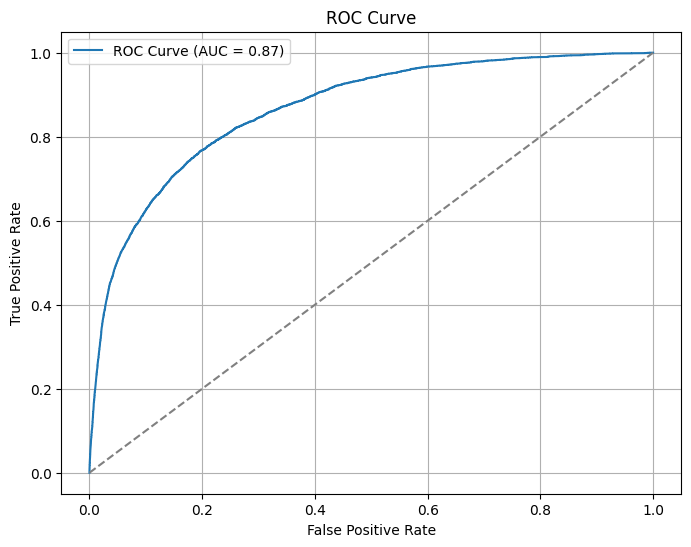

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb

# Create the Model
# XGBoost Model
xg_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xg_clf.fit(X_resampled, y_resampled)

# Tahmin ve değerlendirme
y_pred = xg_clf.predict(X_test)
y_proba = xg_clf.predict_proba(X_test)[:, 1]

# Print the results
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Skoru:", roc_auc)

# Drawing ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

<h2>Feature Importance with XGBoost</h2>
<p>In this step, we evaluate the importance of each feature in the XGBoost model.</p>
<ul>
    <li>The <code>XGBClassifier</code> is used to fit the model on the training data <code>X_train</code> and <code>y_train</code>.</li>
    <li>After training, we extract the feature importances using the <code>feature_importances_</code> attribute of the model.</li>
    <li>A DataFrame is created containing the features and their corresponding importance values.</li>
    <li>The features are sorted in descending order based on their importance.</li>
    <li>A horizontal bar plot is generated to visualize the importance of each feature. The longer the bar, the more important the feature is in predicting the target variable.</li>
</ul>


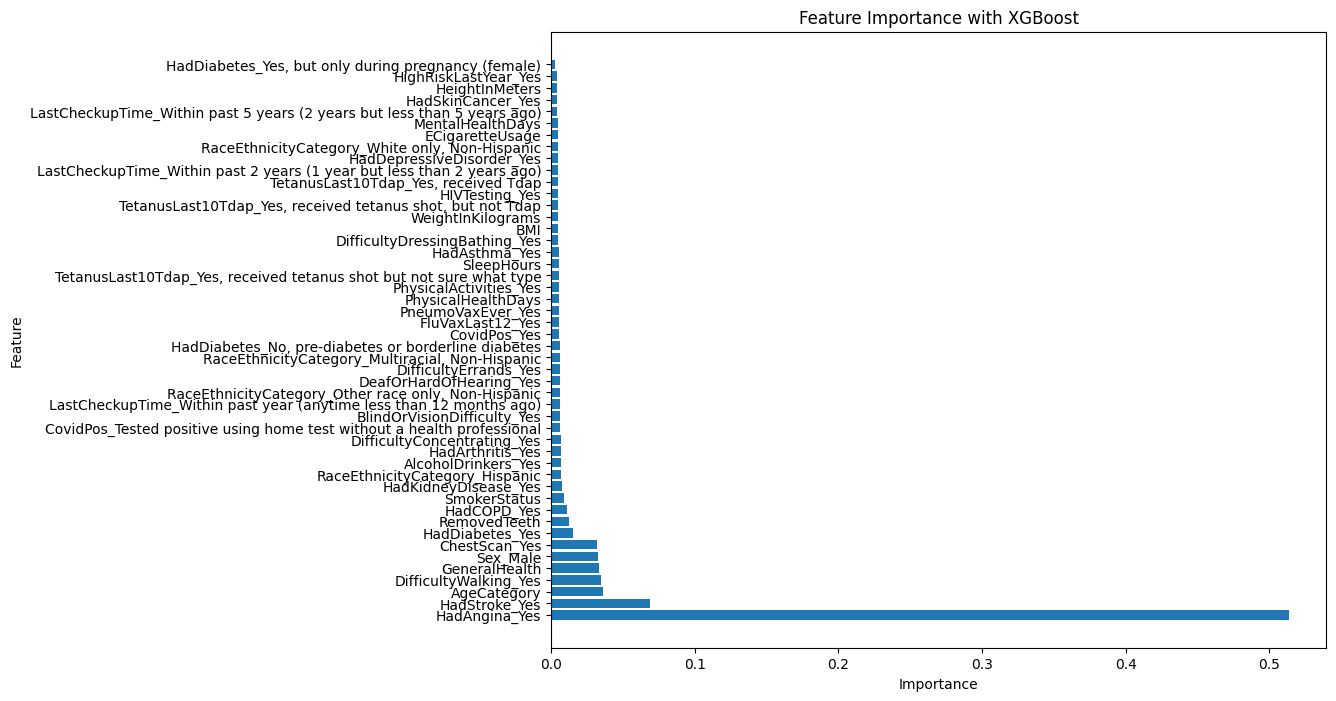

In [14]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

xg_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xg_clf.fit(X_train, y_train)

importances = xg_clf.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance with XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<h2>Conclusion</h2>

<p>In this project, I created a model to predict the likelihood of someone having a heart attack based on their health data. By analyzing medical history, lifestyle, and other health factors, the model can help identify people who may be at risk. ❤️</p>

<p>I used a powerful machine learning technique called <strong>XGBoost</strong>, and the model gave a <strong>93% accuracy</strong> in predicting heart attack risk. This means the model is pretty good at identifying those who need attention. The model works well for both healthy individuals and those who may be at higher risk. 📊</p>

<p>I also applied a method called <strong>SMOTE</strong> to help improve the model’s accuracy by balancing the data. While the current model performs well, there’s always room for improvement—like adding more health information or trying other methods in the future. 🔧</p>

<p>This model could be very useful for healthcare providers in identifying high-risk patients early on, allowing them to take preventive actions. 🏥</p>
